In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import sem

get_ipython().magic('matplotlib notebook')


In [2]:
#Set csv file locations and load data into dataframes

# File locations
mouse_data_path = "./mouse_drug_data.csv"
trial_data_path = "./clinicaltrial_data.csv"

#Load dataframes

mouse_drug_df = pd.read_csv(mouse_data_path)
mouse_drug_df.head()

trial_data_df = pd.read_csv(trial_data_path)
trial_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
#Merge the two dataframes so we're only working with one file

drug_results_df = pd.merge(mouse_drug_df, trial_data_df, on=['Mouse ID'])

#Rename the tumor volume column because it's annoying
drug_results_df = drug_results_df.rename(columns={'Tumor Volume (mm3)': 'Volume'})  

#Drop all drugs except for Capomulin, Infubinol, Ketapril, and Placebo because these are the only ones we need to analyze

drug_results_df = drug_results_df[drug_results_df['Drug'].isin(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])]
drug_results_df.head(10)

,Mouse ID,Drug,Timepoint,Volume,Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0
398,n923,Ketapril,10,48.791950,1
399,n923,Ketapril,15,51.738706,1
400,n923,Ketapril,20,52.599206,1
401,n923,Ketapril,25,56.855465,2
402,n923,Ketapril,30,59.632561,3


In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

#First get rid of the number of metastatic sites and mice for this analysis because we don't need them

drug_results_tumor_df = pd.DataFrame({'Drug' : drug_results_df['Drug'], 'Timepoint' : drug_results_df['Timepoint'], 
                                     'Volume' : drug_results_df['Volume']})

#Get the average tumor volume for each drug/timepoint group and then put results into a new dataframe
drug_results_grp = drug_results_tumor_df.groupby(['Drug', 'Timepoint'])
drug_results_grp.mean()

drug_tumor_sum_df = pd.DataFrame(drug_results_grp.mean().reset_index())
drug_tumor_sum_df.head(10)

#rename the Volume column Average Volume

drug_tumor_sum_df.columns = ['Drug', 'Timepoint', 'Average Volume']
drug_tumor_sum_df.head(10)

,Drug,Timepoint,Average Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint


sem_drug = drug_tumor_sum_df.groupby('Drug').sem()

drug_results_grp = drug_results_tumor_df.groupby(['Drug', 'Timepoint']).sem()
drug_results_grp

#Convert the grouped object into a dataframe and then display a preview
drug_tumor_sem_df = pd.DataFrame(drug_results_grp.reset_index())
drug_tumor_sem_df.head(20)

#rename the Volume column to SEM

drug_tumor_sem_df.columns = ['Drug', 'Timepoint', 'SEM Volume']
drug_tumor_sem_df.head(10)

,Drug,Timepoint,SEM Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [6]:
# Minor Data Munging to Re-Format the Data Frames

#Pivot the AVG volume dataframe so that the drugs are the columns and the index is the timepoint
drug_tumor_avg_df = drug_tumor_sum_df.pivot(index='Timepoint', columns = 'Drug', values = 'Average Volume')
drug_tumor_avg_df

#Pivot the SEM volume dataframe so that the drugs are the columns and the index is the timepoint
drug_tumor_sem_df = drug_tumor_sem_df.pivot(index='Timepoint', columns = 'Drug', values = 'SEM Volume')
drug_tumor_sem_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


In [7]:
#Build lists of mean and sem values for each drug.  These are needed 
#so each drug can be graphed separately and we need to send
#lists into the plot method.

#Capomulin
capo_means = drug_tumor_avg_df.loc[:, ['Capomulin']]
capo_means = capo_means['Capomulin']

capo_sem = drug_tumor_sem_df.loc[:, ['Capomulin']]
capo_sem = capo_sem['Capomulin']

#Infubinol
infub_means = drug_tumor_avg_df.loc[:, ['Infubinol']]
infub_means = infub_means['Infubinol']

infub_sem = drug_tumor_sem_df.loc[:, ['Infubinol']]
infub_sem = infub_sem['Infubinol']

#Ketapril
keta_means = drug_tumor_avg_df.loc[:, ['Ketapril']]
keta_means = keta_means['Ketapril']

keta_sem = drug_tumor_sem_df.loc[:, ['Ketapril']]
keta_sem = keta_sem['Ketapril']

#Placebo
placebo_means = drug_tumor_avg_df.loc[:, ['Placebo']]
placebo_means = placebo_means['Placebo']

placebo_sem = drug_tumor_sem_df.loc[:, ['Placebo']]
placebo_sem = placebo_sem['Placebo']

<IPython.core.display.Javascript object>


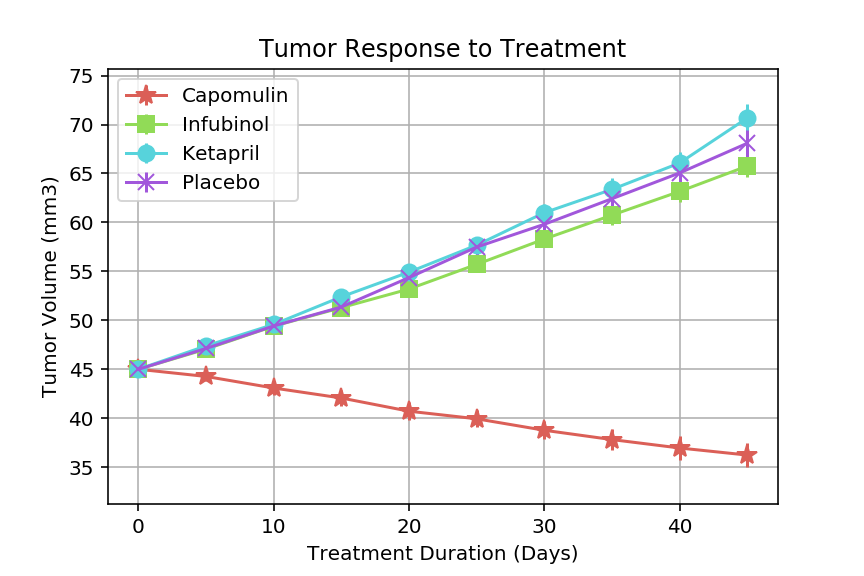

In [8]:
# Generate the Plot (with Error Bars)

#Get min and max values for the avg tumor volume so we set limits on the plot
min_volume = drug_tumor_sum_df.min()['Average Volume']
max_volume = drug_tumor_sum_df.max()['Average Volume']

#add/subtract 5 from the min and max volumes to give some additional white space on the plot
min_volume = min_volume - 5
max_volume = max_volume + 5

#Use the hls color space from Seaborn to give the plot a prettier look
current_palette_4 = sns.color_palette("hls", 4)
sns.set_palette(current_palette_4)

#Assign limits, turn on the background grid and create a title and labels
plt.grid(True)
plt.ylim(min_volume, max_volume)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Treatment Duration (Days)")
plt.title("Tumor Response to Treatment")


#Plot the average tumor size over time for each drug (with error bars)

#The values for the x-axis will be the timepoints
time = list(drug_tumor_avg_df.index.values)

#Plot Capomulin
plt.errorbar(time, capo_means, capo_sem, marker = "*", ms = 10, label = "Capomulin")

#Plot Infubinol
plt.errorbar(time, infub_means, infub_sem, marker = "s", ms = 8, label = "Infubinol")

#Plot Ketapril
plt.errorbar(time, keta_means, keta_sem, marker = "o", ms= 8, label = "Ketapril")

#Plot Placebo
plt.errorbar(time, placebo_means, placebo_sem, marker = "x", ms= 8, label = "Placebo")

#Add a legend, save the plot as a png file and then show the plot
plt.legend(frameon=True)

plt.savefig('Tumor Response.png') 

plt.show()

In [9]:
#Calculate the mean of the metastatic sites grouped by Drug and Timepoint

#First get rid of the volume and mice for this analysis because we don't need them
drug_results_met_df = pd.DataFrame({'Drug' : drug_results_df['Drug'], 'Timepoint' : drug_results_df['Timepoint'], 
                                     'Metastatic Sites' : drug_results_df['Metastatic Sites']})

#drug_results_met_df.head(20)

# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_mets_grp = drug_results_met_df.groupby(['Drug', 'Timepoint'])
drug_mets_grp.mean()

#Convert grouped results into a new dataframe and reset the index
drug_met_avg_df = pd.DataFrame(drug_mets_grp.mean().reset_index())
#drug_met_avg_df.head(20)

#rename the mets column Average Met Sites and preview the dataframe
drug_met_avg_df.columns = ['Drug', 'Timepoint', 'Average Met Sites']
drug_met_avg_df.head(10)

#Get the min and max of the average met sites to use as limits in our plot
min_mets = drug_met_avg_df.min()['Average Met Sites']
max_mets = drug_met_avg_df.max()['Average Met Sites']

In [10]:
## Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_sem_grp = drug_results_met_df.groupby(['Drug', 'Timepoint']).sem()

#Convert the grouped object into a dataframe and then display a preview
drug_mets_sem_df = pd.DataFrame(met_sem_grp.reset_index())
drug_mets_sem_df.head(20)

#rename the Metastatic Sites column to SEM
drug_mets_sem_df.columns = ['Drug', 'Timepoint', 'SEM Met Sites']
drug_mets_sem_df.head(20)

,Drug,Timepoint,SEM Met Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [11]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

#Pivot the AVG mets dataframe so that the drugs are the columns and the index is the timepoint
drug_met_avg_df = drug_met_avg_df.pivot(index='Timepoint', columns = 'Drug', values = 'Average Met Sites')
drug_met_avg_df.head(10)

#Pivot the SEM volume dataframe so that the drugs are the columns and the index is the timepoint
drug_mets_sem_df = drug_mets_sem_df.pivot(index='Timepoint', columns = 'Drug', values = 'SEM Met Sites')
drug_mets_sem_df.head(10)

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


In [12]:
#Build lists of mean and sem values for each drug.  These are needed 
#so each drug can be graphed separately and we need to send
#lists into the plot method.

#Capomulin
capo_met_means = drug_met_avg_df.loc[:, ['Capomulin']]
capo_met_means = capo_met_means['Capomulin']

capo_met_sem = drug_mets_sem_df.loc[:, ['Capomulin']]
capo_met_sem = capo_met_sem['Capomulin']

#Infubinol
infub_met_means = drug_met_avg_df.loc[:, ['Infubinol']]
infub_met_means = infub_met_means['Infubinol']

infub_met_sem = drug_mets_sem_df.loc[:, ['Infubinol']]
infub_met_sem = infub_met_sem['Infubinol']

#Ketapril
keta_met_means = drug_met_avg_df.loc[:, ['Ketapril']]
keta_met_means = keta_met_means['Ketapril']

keta_met_sem = drug_mets_sem_df.loc[:, ['Ketapril']]
keta_met_sem = keta_met_sem['Ketapril']

#Placebo
placebo_met_means = drug_met_avg_df.loc[:, ['Placebo']]
placebo_met_means = placebo_met_means['Placebo']

placebo_met_sem = drug_mets_sem_df.loc[:, ['Placebo']]
placebo_met_sem = placebo_met_sem['Placebo']
placebo_met_sem

Timepoint
0     0.000000
5     0.100947
10    0.115261
15    0.190221
20    0.234064
25    0.263888
30    0.300264
35    0.341412
40    0.297294
45    0.304240
Name: Placebo, dtype: float64

<IPython.core.display.Javascript object>


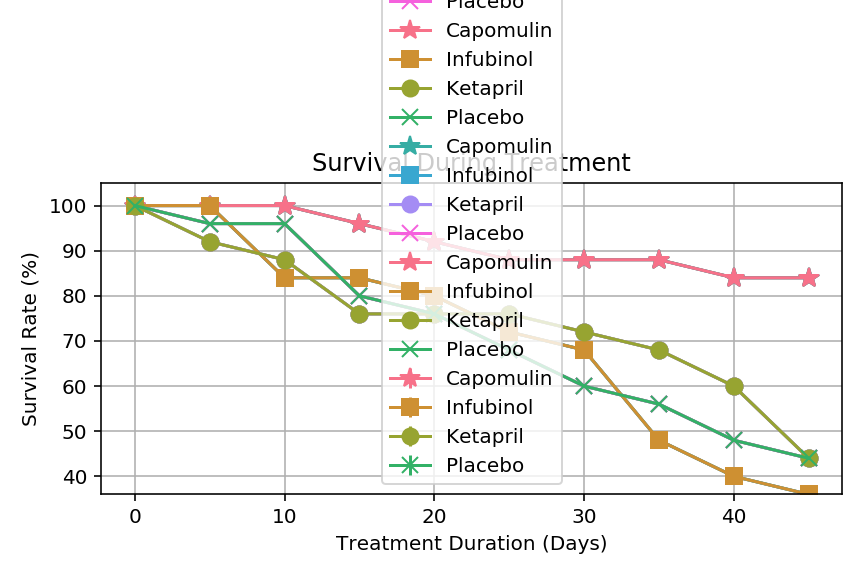

In [13]:
#Plot the metastatic spread over time for each drug and include error bars

#Use the husl color palette from Seaborn
current_palette_8 = sns.color_palette("husl", 8)
sns.set_palette(current_palette_8)

#Add a bit to the max mets so that the lines aren't going off the edge of the graph
max_mets = max_mets + 0.5

#Set limits, turn on background gridlines, create labels
plt.grid(True)
plt.ylim(min_mets, max_mets)
plt.ylabel("# Of Met Sites")
plt.xlabel("Treatment Duration (Days)")
plt.title("Metastatic Spread During Treatment")

#Set the timepoints up on the x-axis
time = list(drug_met_avg_df.index.values)

#Plot Capomulin
plt.errorbar(time, capo_met_means, capo_met_sem, marker = "*", ms = 10, label = "Capomulin")

#Plot Infubinol
plt.errorbar(time, infub_met_means, infub_met_sem, marker = "s", ms = 8, label = "Infubinol")

#Plot Ketapril
plt.errorbar(time, keta_met_means, keta_met_sem, marker = "o", ms = 8, label = "Ketapril")

#Plot Placebo
plt.errorbar(time, placebo_met_means, placebo_met_sem, marker = "x", ms = 8, label = "Placebo")

#Add a legend, save the plot as a png file and then show the plot
plt.legend(frameon=True)

plt.savefig('Metastatic Spread.png') 

plt.show()

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint

#First create a new dataframe that only includes the mice, drug and timepoint columns
drug_results_survival_df = pd.DataFrame({'Mice' : drug_results_df['Mouse ID'],
                                         'Drug' : drug_results_df['Drug'], 'Timepoint' : drug_results_df['Timepoint']})
drug_results_survival_df.head()

#group the dataframe by drug and timepoint
data_mice_count = drug_results_survival_df.groupby(['Drug', 'Timepoint'])

#convert the grouped object into a dataframe and reset the index
survival_count_df = pd.DataFrame(data_mice_count.count().reset_index())

#rename the Mice column to # of Surviving Mice
survival_count_df = survival_count_df.rename(columns={'Mice' : '# of Surviving Mice'})
survival_count_df.head()

,Drug,Timepoint,# of Surviving Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
#Create a new dataframe that shows the survival rate as a percentage
survival_percent_df = pd.DataFrame({"Drug" : survival_count_df['Drug'], "Timepoint": survival_count_df['Timepoint'],
                                    "Survival %" : (survival_count_df['# of Surviving Mice'] / 25) * 100})
survival_percent_df.head()

,Drug,Timepoint,Survival %
0,Capomulin,0,100.0
1,Capomulin,5,100.0
2,Capomulin,10,100.0
3,Capomulin,15,96.0
4,Capomulin,20,92.0


In [17]:
#Pivot the count of mice survival dataframe so that the drugs are the columns and the index is the timepoint

survival_percent_df = survival_percent_df.pivot(index='Timepoint', columns = 'Drug', values = 'Survival %')

#Preview the dataframe
survival_percent_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


In [21]:
# Generate the Plot (Accounting for percentages)

current_palette_8 = sns.color_palette("husl", 8)
sns.set_palette(current_palette_8)

#get the minimum survival rate for our y-axis limit
min_survival_percent = survival_percent_df.min()
min_survival_percent = min_survival_percent.min()

#lower the minimum so our lines don't go off the sides of the figure
min_rate = min_survival_percent - 12

#Assign the x-axis values
x_axis = list(survival_percent_df.index.values)

#Assign the survival rates for each drug to variables
capo_survival_percent = survival_percent_df.loc[:, ['Capomulin']]
infub_survival_percent = survival_percent_df.loc[:, ['Infubinol']]
keta_survival_percent = survival_percent_df.loc[:, ['Ketapril']]
placebo_survival_percent = survival_percent_df.loc[:, ['Placebo']]

#Create the plot
plt.grid(True)
plt.ylim(min_survival_percent, 105)
plt.ylabel("Survival Rate (%)")
plt.xlabel("Treatment Duration (Days)")
plt.title("Survival During Treatment")
plt.plot(x_axis, capo_survival_percent, marker = "*", ms = 10, label = "Capomulin")
plt.plot(x_axis, infub_survival_percent, marker = "s", ms = 8, label = "Infubinol")
plt.plot(x_axis, keta_survival_percent, marker = "o", ms = 8, label = "Ketapril")
plt.plot(x_axis, placebo_survival_percent, marker = "x", ms = 8, label = "Placebo")

#Add a legend and specify that we want a tight layout
plt.legend(frameon=True)
plt.tight_layout()

# Save the Figure
plt.savefig('Survival Rates.png') 

#Display the figure
plt.show()

In [22]:
# Calculate the percent tumor volume changes for the 4 drugs

#Use the tumor volume average dataframe that was created in a prior step.
#Use the pct_change method to calculate the percentage change from the
#beginning of the drug trial to the end.  From 0 to 45 is 9 timepoints.  

volume_pct_changes = drug_tumor_avg_df.pct_change(periods=9).dropna()
volume_pct_changes = volume_pct_changes.reset_index()
print(volume_pct_changes)

#Figure out what the index is on the new dataframe
indexv = volume_pct_changes.keys()
#print(indexv)

Drug  Timepoint  Capomulin  Infubinol  Ketapril  Placebo
0            45  -0.194753   0.461235  0.570288  0.51298


In [ ]:
#Store all of the percentage volume changes in a tuple
capo_vol_change = round(volume_pct_changes['Capomulin'][0] * 100, 2)

infub_vol_change = round(volume_pct_changes['Infubinol'][0] * 100, 2)

keta_vol_change = round(volume_pct_changes['Ketapril'][0] * 100, 2)

placebo_vol_change = round(volume_pct_changes['Placebo'][0] * 100, 2)

#Create a list that contains all of the above tuples.  The list will be used in our barchart.
tumor_vol_changes = [capo_vol_change, infub_vol_change, keta_vol_change, placebo_vol_change]
tumor_vol_changes